# Notebook to Look at SMELT results 


In [65]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

%matplotlib inline

In [66]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [67]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

final = '/results/SalishSea/nowcast-green/30mar16/'
date = datetime.datetime(2016, 3, 30)
ptrc_T = results_dataset(final, date, 1, '1h', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][:,:,:,:]
print (nitrateF.shape)

initial = '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/initial_green/BioIC_SMELT_v1.nc'
ni = nc.Dataset(initial)
nitrate0 = ni.variables['NO3'][0,:]

/results/SalishSea/nowcast-green/30mar16/SalishSea_1h_20160330_20160330_ptrc_T.nc
(24, 40, 898, 398)


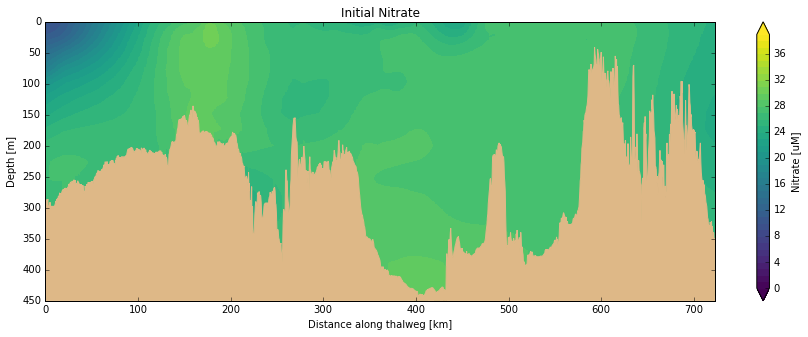

In [68]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 40., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Initial Nitrate')

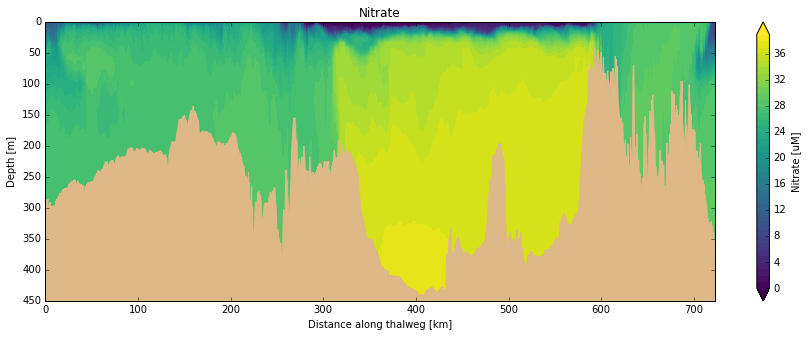

In [69]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF[23], bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Nitrate')

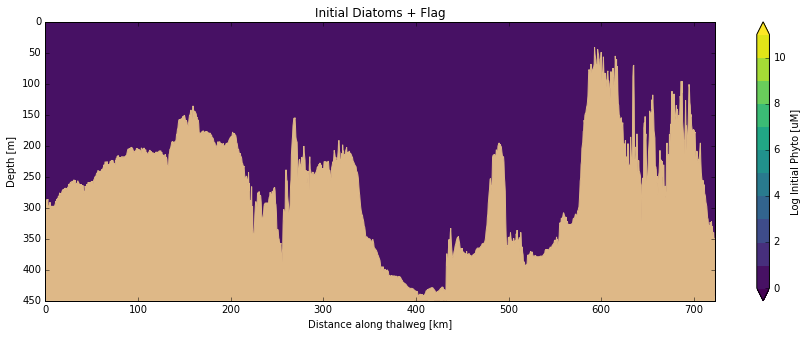

In [86]:
phyto0 = ni.variables['PHY'][0,:] + ni.variables['PHY2'][0,:]
clevels = np.arange(0, 12, 1.)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, phyto0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Log Initial Phyto [uM]')
ax.set_title('Initial Diatoms + Flag');

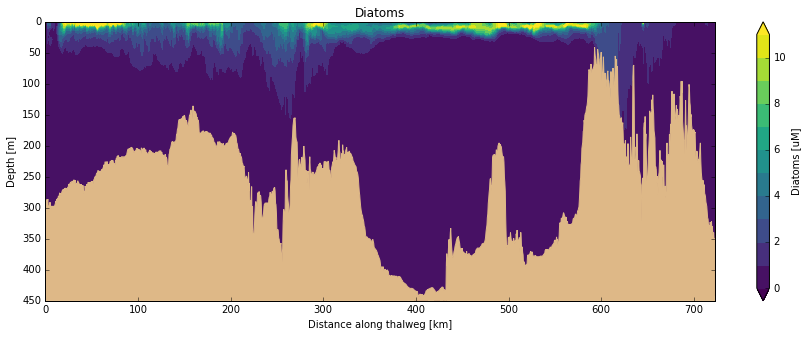

In [87]:
diatoms = ptrc_T.variables['PHY2'][23,:,:,:]
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, diatoms, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Diatoms [uM]')
ax.set_title('Diatoms');

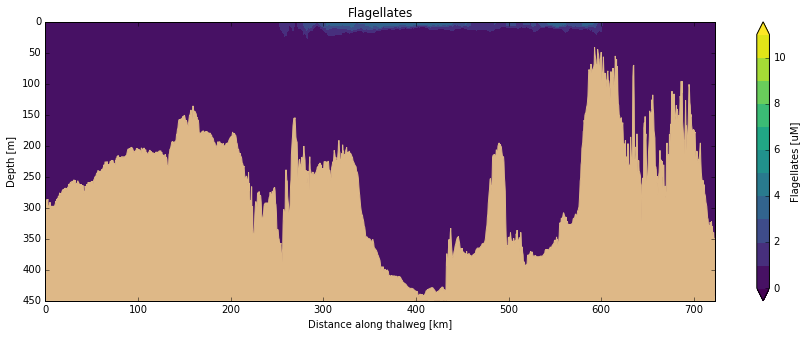

In [89]:
flag = ptrc_T.variables['PHY'][23,:,:,:]
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, flag, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Flagellates [uM]')
ax.set_title('Flagellates');

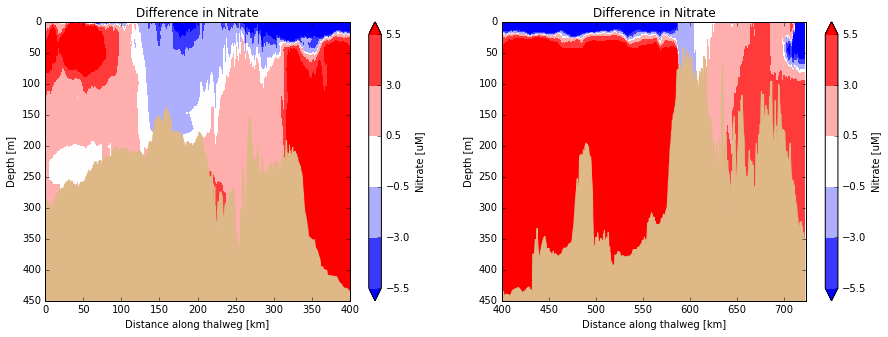

In [90]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
clevels = [-5.5, -3, -0.5, 0.5, 3, 5.5]

cbar = vis.contour_thalweg(ax[0], nitrateF[4]-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[0].set_ylim([450,0])
ax[0].set_xlim([0,400])
cbar.set_label('Nitrate [uM]')
ax[0].set_title('Difference in Nitrate')

cbar = vis.contour_thalweg(ax[1], nitrateF[4]-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[1].set_ylim([450,0])
ax[1].set_xlim([400, 724])
cbar.set_label('Nitrate [uM]')
ax[1].set_title('Difference in Nitrate')